In [1]:
import numpy as np
from scipy.spatial import KDTree
import matplotlib.pyplot as plt

In [2]:
#index
X1 = 0      # position x1
VEL1 = 1    # velocity in x1 direction 
MAS = 2     # mass 
LEN = 3     # smoothing length
DEN = 4     # density
ENE = 5     # internal energy (u) 
PRE = 6     # pressure 
SPE = 7     # sound speed

def setup(n, xmin, xmax, rho0, cs, nghost = 0):   # new setup that can include ghost particles.
    particles = np.zeros((n+2*nghost, 8))
    dx = (xmax - xmin)/n
    m0 = rho0*dx
    for i in range(nghost, n+nghost):
        particles[i, X1] = xmin + 0.5*dx + i*dx
        particles[i, MAS] = m0 
        particles[i, VEL1] = 1e-4*cs*np.sin(4.*np.pi*particles[i, X1])
        particles[i, LEN] = 1.2*dx
    return particles

def set_ghosts(particles, nghost, L):
    for i in range(nghost):
        particles[i] = particles[-2*nghost+i]
        particles[i, X1] = particles[i, X1] - L
        particles[-nghost+i] = particles[nghost+i]
        particles[-nghost+i, X1] = particles[-nghost+i, X1] + L
    return particles

def F_kernel(q): 
    if q>=0 and q<1:
        return 1-1.5*q**2+0.75*q**3
    if q>=1 and q<2:
        return 0.25*(2-q)**3
    if q>=2:
        return 0

def F_kernel_p(q): 
    if q>=0 and q<1:
        return -3.*q + 3*0.75*q**2
    if q>=1 and q<2:
        return 0.75*(2-q)**2*(-1)
    if q>=2:
        return 0
    
def W_1order(dist, h):
    q = dist/h
    C = 2./3.
    return C*F_kernel(q)/h**1

def W_1order_p(ra, rb, h):
    q = abs(ra-rb)/h
    C = 2./3.
    rhat = (rb-ra)/abs(ra-rb)
    return rhat*C*F_kernel_p(q)/h**2

def get_density(particles):
    n = len(particles)
    for i in range(n):
        particles[i, DEN] = 0
        for j in range(n):
            particles[i, DEN] += particles[j, MAS]*W_1order(abs(particles[i,X1]-particles[j,X1]), particles[i,LEN])
    return particles

def eos_iso(rho, cs = 0.1):
    p = cs**2*rho
    return p

100


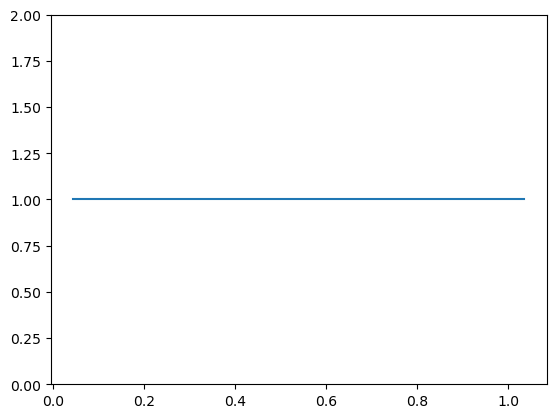

In [3]:
n = 100
xmin = 0
xmax = 1.
L = xmax - xmin
rho0 = 1.0
cs = 0.1
nghost = 4
particles = setup(n, xmin, xmax, rho0, cs, nghost)
particles = set_ghosts(particles, nghost, L)

particles = get_density(particles)
act_par = particles[nghost:-nghost]
plt.plot(act_par[:, X1], act_par[:, DEN])
plt.ylim(0,2)
plt.show()